<img src="https://raw.githubusercontent.com/instill-ai/cookbook/main/images/Logo.png" alt="Instill Logo" width="300"/>

# Curate Structured Insights from the Web with **Instill VDP** on **Instill Cloud**

In this notebook we will demonstrate how to generate structured insights from the web using either a Google Search query, or simply specifying a URL. This content complements our tutorial: ["Mastering OpenAI's Structured Outputs"](https://www.instill.tech/blog/mastering-openai-structured-outputs), where we provide a step-by-step guide for building an LLM-powered knowledge curation pipeline with **Instill VDP** on **Instill Cloud**, highlight best practices along the way.

More specifically, we will be calling two pipelines in this notebook using our [Python SDK](https://www.instill.tech/docs/sdk/python):
1. Full Pipeline: [structured-web-insights](https://instill.tech/instill-ai/pipelines/structured-web-insights/playground) (requires your own Google API key, see setup docs)
2. URL-only Version: [structured-website-summary](https://instill.tech/instill-ai/pipelines/structured-web-insights-from-url/playground) (no Google search, input specific URL)

We recommend that you first start by going through the [tutorial](https://www.instill.tech/blog/mastering-openai-structured-outputs) - **see the video below** - which walks you through the steps required to build the pipeline that we will be calling in this notebook!

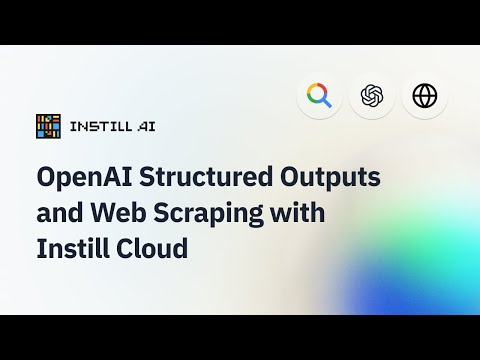

In [1]:
from IPython.display import YouTubeVideo

YouTubeVideo('x0XsmuCrit8', width=1000, height=600)

### Setup

To execute all of the code in this notebook, you’ll need to create a free Instill Cloud account and setup an API Token. To create your account, please refer to our [quickstart guide](https://www.instill.tech/docs/quickstart). For generating your API Token, consult the [API Token Management](https://www.instill.tech/docs/core/token) page.

**This will give you access to 10,000 free credits per month that you can use to make API calls with third-party AI vendors. Please see our [documentation](https://www.instill.tech/docs/cloud/credit) for further details.**

We will now install the latest Instill Python SDK, import the required libraries, and configure the SDK with a valid API token.

In [3]:
!pip install instill-sdk==0.13.0 --quiet

In [5]:
from google.protobuf.json_format import MessageToDict
from pprint import pprint
from IPython.display import IFrame

from instill.clients import init_pipeline_client
pipeline = init_pipeline_client(api_token="YOUR_INSTILL_API_TOKEN")

### 1. Structured Web Insights from URL

Here, we will view and try out the [structured-web-insights-from-url](https://instill.tech/instill-ai/pipelines/structured-web-insights-from-url/playground) pipeline. Checkout the pipeline preview page and README in the IFrame below to see the structure of this pipeline and understand how it works!

In [6]:
IFrame('https://instill.tech/instill-ai/pipelines/structured-web-insights-from-url/preview', width=1000, height=700)

In [7]:
response = pipeline.trigger(
    namespace_id="instill-ai",
    pipeline_id="structured-web-insights-from-url",
    data=[{"query": "I want to know about structured output best practices",
           "website-url": "https://www.instill.tech/blog/llm-structured-outputs"}],
)

In [8]:
response = MessageToDict(response)

structured_output = response["outputs"][0]["structured-output"]
pprint(structured_output)

{'author': 'George Strong',
 'key_insights': ["OpenAI's structured outputs API represents a significant "
                  'advancement in handling unstructured data.',
                  'LLMs often struggle with reasoning tasks when subjected to '
                  'strict format restrictions.',
                  'Effective techniques for generating structured outputs '
                  'include prompt engineering, output parsing, and error '
                  'handling.',
                  'A multistep pipeline approach can enhance the accuracy of '
                  'reasoning and structured output generation by separating '
                  'these tasks.'],
 'published_date': 'August 28, 2024',
 'source': 'Instill AI Blog',
 'summary': 'The article discusses best practices for generating structured '
            'outputs from Large Language Models (LLMs), particularly in light '
            "of OpenAI's recent introduction of structured outputs in their "
            'API. It hi

In [9]:
print(response["outputs"][0]["scraped-content"])

The Best Way to Generate Structured Output from LLMs \| Blog

Hacktoberfest 2024! [Win Instill AI Swag Pack!](https://www.instill.tech/blog/hacktoberfest-2024-opening)

ExploreFor BusinessFor DevelopersCompany [Pricing](http://www.instill.tech/pricing)

Get Started

Blog

![The theme of this tutorial](http://www.instill.tech/blog-assets/structured-outputs/scaffolding.png)

# The Best Way to Generate Structured Output from LLMs

Benchmarking LLM structured output performance with OpenAI, Instructor, Marvin, BAML, TypeChat, LangChain, and how to overcome reasoning deficiencies using a multi-step Instill VDP pipeline.

August 28, 2024

Insight

![George Strong's github avatar](http://www.instill.tech/author-avatar/george.jpeg)

[George Strong](https://github.com/georgewilliamstrong)

Industries are eagerly capitalizing on Large Language Models (LLMs) to unlock
the potential within their vast reserves of under-utilized unstructured data.
Given that up to [80% of the worlds data is soon for

### 2. Structured Web Insights from Google Search

Here, we will view and try out the [structured-web-insights](https://instill.tech/instill-ai/pipelines/structured-web-insights/playground) pipeline. Checkout the pipeline preview page and README in the IFrame below to see the structure of this pipeline and understand how it works!

As explained in Step 1 of the [tutorial](https://www.instill.tech/blog/mastering-openai-structured-outputs), you will need to configure your Google Search and API key first.

In [10]:
IFrame('https://instill.tech/instill-ai/pipelines/structured-web-insights/preview', width=1000, height=700)

In [9]:
response = pipeline.trigger(
    namespace_id="instill-ai",
    pipeline_id="structured-web-insights",
    data=[{"search-query": "What does Instill AI do?",
           "google-cse-id": "INSERT YOUR GOOGLE CSE ID HERE"}], # Insert your Google CSE ID here
)

In [10]:
response = MessageToDict(response)

structured_output = response["outputs"][0]["structured-output"]
pprint(structured_output)

{'author': 'Not available',
 'key_insights': ['Instill AI provides a comprehensive solution for making '
                  'unstructured data AI-ready.',
                  'The platform includes features for data cleaning, '
                  'transformation, and integration, making it easier to manage '
                  'complex data flows.',
                  'It offers an API-first approach, allowing developers to '
                  'easily retrieve relevant data for AI applications.',
                  'Users can switch between different AI models and vendors, '
                  'optimizing costs and performance.',
                  'The platform is designed to be secure and enterprise-ready, '
                  'with options for cloud-native or on-premises deployment.'],
 'published_date': 'Not available',
 'source': 'Instill AI website (https://www.instill.tech/)',
 'summary': 'Instill AI offers a full-stack AI solution designed to streamline '
            'data operations and

In [11]:
print(response["outputs"][0]["scraped-content"])

Instill AI

![beam](http://www.instill.tech/images/landing-page/hero/1.svg)

![beam](http://www.instill.tech/images/landing-page/hero/3.svg)![beam](http://www.instill.tech/images/landing-page/hero/4.svg)

![beam](http://www.instill.tech/images/landing-page/hero/2.svg)![beam](http://www.instill.tech/images/landing-page/hero/4.svg)![beam](http://www.instill.tech/images/landing-page/hero/8.svg)![beam](http://www.instill.tech/images/landing-page/hero/10.svg)

![beam](http://www.instill.tech/images/landing-page/hero/9.svg)![beam](http://www.instill.tech/images/landing-page/hero/8.svg)![beam](http://www.instill.tech/images/landing-page/hero/10.svg)

![blurred spot](http://www.instill.tech/images/landing-page/3.svg)![blurred spot](http://www.instill.tech/images/landing-page/4.svg)![beam](http://www.instill.tech/images/landing-page/1.svg)![beam](http://www.instill.tech/images/landing-page/2.svg)![blurred spot](http://www.instill.tech/images/landing-page/5.svg)![blurred spot](http://www.instill

In [12]:
pipeline.close()